## Gathering
In this phase we gather the necessary data for our analysis which can be acheived using the given data sources as follows:

1- Enhanced Twitter Archive (.csv)

2- Twitter API.

3- Image Predictions File. 

In [1]:
#Importing important libraries

import numpy as np 
import pandas as pd 
import requests
import re 
import json
import tweepy
import matplotlib.pyplot as plt 
import os
import datetime 
from scipy import stats
import seaborn as sns
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')
from timeit import default_timer as timer

### 1- Twitter Archive

In [2]:
#Creating dataframe from twitter-archive-enhanced
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2- Image Predictions

In [3]:
#Downloading (image_predictions.tsv) file programmatically using the requests library using the provided url
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [4]:
#Creating a folder if doesn't exist & write the file_name inside it
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

#Put the tsv file to a Pandas DataFrame
image_predictions = pd.read_csv('image_predictions.tsv', sep= '\t')

In [5]:
#Now we need to find the Tweets IDs to to get our JSON data
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

2356

### 3- Twitter API 

In [6]:
#We create a for loop to add each tweet to a list
tweets_data = []
#Opening the tweets file
tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
            continue 
            
tweet_file.close()
#Create a Pandas DataFrame for the formed Tweet file
tweet_info = pd.DataFrame()

In [7]:
#Insert the required variables to the newly formed DataFrame

tweet_info["id"] = list(map(lambda tweet: tweet["id"], tweets_data))
tweet_info["favorite_count"] = list(map(lambda tweet: tweet["favorite_count"], tweets_data))
tweet_info["retweet_count"] = list(map(lambda tweet: tweet["retweet_count"], tweets_data ))
tweet_info.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing
In this stage we display the data we gathered in the 'Gathering' step to assess its Quality and Tidiness.
Quality dimensions or aspects are mainly:

1- Completness (checking if there are any missing records).

2- Validity (Checking if the values displayed are 'valid' i.e data that follow certain known rules)

3- Accuracy (a significant decrease or increase in a value is considered an 'inaccurate data')

4- Consistency (There should be only one way to represent or refer to a value otherwise the data is called to be 'inconsistent')

In [8]:
#Now we review the first records in the twitter archive
archive_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
#Review the last 5 records in the same DataFrame
archive_df.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [10]:
#Get the main Info of the Twitter Archive DataFrame
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
#Get more details about the Twitter Archive DF.
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### 2- Image Predictions 

In [12]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [14]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### 3- Twitter Info

In [16]:
tweet_info.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [17]:
tweet_info.tail()

,id,favorite_count,retweet_count
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48
2353,666020888022790149,2535,532


In [18]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [19]:
tweet_info.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


### To make the cleaning easier we can join the tweet_info dataset to the Twitter Archive dataset.

In [20]:
archive_df = archive_df.rename(columns={'tweet_id': 'id'})

In [21]:
master_df = pd.merge(archive_df, tweet_info, on=['id'], how='left')
master_df.head(2)

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,39467.0,8853.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,33819.0,6514.0


## Cleaning

### Quality:

#### Master DF & Image_predictions

1- There're 59 missing expanded_urls which refer to tweets without photos so we have to remove those records.

2- There're 181 retweet records that should be removed.

3- retweet_counts & favorite_counts columns should be in Integer form not float.

4- timestamp should be in datetime format.

5- Correct wrong numerator values & change 'rating_numerator' & 'rating_denominator' to float.

6- Make the 'source' more readable and then convert it to category.

7- Tweet_id in image_predictions and Twitter Archive should be 'str'

8- Change missing values in the 'name' column to NaN and remove incorrect names and remove incorrect names.

9- Correct Ratings that were extracted incorrectly from the text.

### Tideness:

1- Create a column 'dog_stage' instead of the 4 columns.

2- Join Twitter_archive and tweet_info with the Image_predictions DataSet to one dataframe (Final DF).


In [22]:
#Create copies of the datasets before cleaning.
master_df_clean = master_df.copy()
image_predictions_clean = image_predictions.copy()

### Define
Remove the 59 records that have no images

### Code

In [23]:
master_df_clean = master_df_clean.dropna(subset=['expanded_urls'])

### Test

In [24]:
master_df_clean.expanded_urls.isnull().sum()

0

### Define
Remove the 181 retweet records

### Code

In [25]:
master_df_clean = master_df_clean[master_df_clean['retweeted_status_id'].isnull()]


### Test

In [26]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 19 columns):
id                            2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null object
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
favorite_count                2117 non

### Code

In [27]:
columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
master_df_clean = master_df_clean.drop(columns, axis=1)

### Test

In [28]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 16 columns):
id                       2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null object
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
favorite_count           2117 non-null float64
retweet_count            2117 non-null float64
dtypes: float64(4), int64(3), object(9)
memory usage: 281.2+ KB


### Define
convert the 'NaN values in the  favorite count & retweet columns

change their data type from float to integer

### Code


In [29]:
master_df_clean['favorite_count'].fillna(0, inplace=True)
master_df_clean['retweet_count'].fillna(0, inplace=True)

In [30]:
master_df_clean.favorite_count = master_df_clean.favorite_count.astype(int)

### Test


In [31]:
master_df_clean.favorite_count.isnull().sum()

0

In [32]:
master_df_clean.retweet_count.isnull().sum()

0

In [33]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 16 columns):
id                       2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null object
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
favorite_count           2117 non-null int64
retweet_count            2117 non-null float64
dtypes: float64(3), int64(4), object(9)
memory usage: 281.2+ KB


### Define
Change the timestamp format from string to datetime

### Code

In [34]:
master_df_clean['timestamp'] = master_df_clean['timestamp'].apply(pd.to_datetime)

### Test

In [35]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 16 columns):
id                       2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
favorite_count           2117 non-null int64
retweet_count            2117 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(4), object(8)
memory usage: 281.2+ KB


### Define
Change 'rating_numerator' & 'rating_denominator' to float.

Modify tweets having incorrect numerators.

Edit the tweet that has no rating.

In [36]:
#Find tweets with decimal ratings.
master_df_clean[master_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]
#It seems that rating numerator for these records doesn't make sense which means that the ratings weren't extracted correctly.

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None,46860,10407.0
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,20296,7069.0
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None,7320,1885.0
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None,1879,542.0


### Code

In [37]:
#Edit incorrect numerators
master_df_clean.loc[(master_df_clean['id'] == 680494726643068929) & (master_df_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26
master_df_clean.loc[(master_df_clean['id'] == 786709082849828864) & (master_df_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
master_df_clean.loc[(master_df_clean['id'] == 883482846933004288) & (master_df_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
master_df_clean.loc[(master_df_clean['id'] == 778027034220126208) & (master_df_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27


### Test

In [38]:
master_df_clean.loc[(master_df_clean['id'] == 680494726643068929)]

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,None,None,None,None,1879,542.0


In [39]:
master_df_clean.loc[(master_df_clean['id'] == 786709082849828864)]

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None,20296,7069.0


In [40]:
master_df_clean.loc[(master_df_clean['id'] == 778027034220126208)]

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,None,None,pupper,None,7320,1885.0


In [41]:
master_df_clean.loc[(master_df_clean['id'] == 883482846933004288)]

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,None,None,None,None,46860,10407.0


### Code

In [42]:
#Change the rating format into float.
master_df_clean.rating_denominator = master_df_clean.rating_denominator.astype(float)
master_df_clean.rating_numerator = master_df_clean.rating_numerator.astype(float)

### Test

In [43]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 16 columns):
id                       2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null float64
rating_denominator       2117 non-null float64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
favorite_count           2117 non-null int64
retweet_count            2117 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2), object(8)
memory usage: 281.2+ KB


### Code

In [44]:
#Find the tweet that has incorrect extracted rating
master_df_clean.loc[(master_df_clean['id'] == 810984652412424192)]

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,None,None,None,None,5927,1655.0


In [45]:
#Removing the incorrect rating
master_df_clean.rating_numerator[516] = ''
master_df_clean.rating_denominator[516] = ''

### Test

In [46]:
master_df_clean.loc[(master_df_clean['id'] == 810984652412424192)]

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",,,Sam,None,None,None,None,5927,1655.0


### Code

In [47]:
#I noticed  1/2 rating which is impossible, no one would give this rating, the rating must've been extracted wrong.
master_df_clean.loc[(master_df_clean['id'] == 666287406224695296)]
master_df_clean.text[2335]
#It's clear that the correct rating is '9/10' not '1/2'

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [48]:
#Correct the wrong rating for (666287406224695296)
master_df_clean.rating_numerator[2335] = '9'
master_df_clean.rating_denominator[2335] = '10'

### Test

In [49]:
master_df_clean.loc[(master_df_clean['id'] == 666287406224695296)]

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9,10,an,None,None,None,None,152,71.0


### Code

In [50]:
# I noticed a 1/10 rating which is very low, let's check it.
master_df_clean.loc[(master_df_clean['id'] == 670783437142401025)]
master_df_clean.text[2091]
# That's weird ! who gives a dog 1/10?! I thought the rating wasn't extracted correctly but that's not the case. 
# it's not a dog, it's a caterpillar!

"Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO"

In [51]:
# I also noticed a 2/10 rating which is very low:
master_df_clean.loc[(master_df_clean['id'] == 670826280409919488)]
master_df_clean.text[2079]
# There's nothing wrong with the rating extraction, this rating is also very low which makes sense because it's not a dog!

"Scary dog here. Too many legs. Extra tail. Not soft, let alone fluffy. Won't bark. Moves sideways. Has weapon. 2/10 https://t.co/XOPXCSXiUT"

### Define
Make the 'source' more readable and convert its format into 'category'

### Code

In [52]:
master_df_clean['source'] = master_df_clean['source'].str.extract('^<a.+>(.+)</a>$')

### Test

In [53]:
master_df_clean.source.value_counts()

Twitter for iPhone     1985
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

### Code

In [54]:
master_df_clean.source = master_df_clean.source.astype('category')

### Test

In [55]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 16 columns):
id                       2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null category
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null object
rating_denominator       2117 non-null object
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
favorite_count           2117 non-null int64
retweet_count            2117 non-null float64
dtypes: category(1), datetime64[ns](1), float64(3), int64(2), object(9)
memory usage: 346.9+ KB


### Define
Change tweet_id to 'str' in Image Predictions DataFrame

### Code

In [56]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype('str')

### Test


In [57]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Define
remove incorrect dogs names

### Code

In [58]:
lower_names= master_df_clean[master_df_clean.name.str.islower()]['id']
for x in lower_names:
    for id_to_remove in master_df_clean.index[master_df_clean['id'] == x].tolist():
        master_df_clean = master_df_clean.drop(id_to_remove)

## Test

In [59]:
master_df_clean[master_df_clean.name.str.islower()]

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count


## Define
Create a 'dog stage' column instead of the 4 classification columns.

Merge the multiple dog stages.

## Code

In [60]:
### Find dogs with multiple stages
master_df_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1689
1,None,None,None,puppo,23
2,None,None,pupper,None,211
3,None,floofer,None,None,9
4,doggo,None,None,None,70
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,9
7,doggo,floofer,None,None,1


In [61]:
# Remove the 'NaN' or 'None' values
master_df_clean.doggo.replace('None', '', inplace=True)
master_df_clean.doggo.replace(np.NaN, '', inplace=True)

master_df_clean.floofer.replace('None', '', inplace=True)
master_df_clean.floofer.replace(np.NaN, '', inplace=True)

master_df_clean.pupper.replace('None', '', inplace=True)
master_df_clean.pupper.replace(np.NaN, '', inplace=True)

master_df_clean.puppo.replace('None', '', inplace=True)
master_df_clean.puppo.replace(np.NaN, '', inplace=True)

In [62]:
#Extract the dog's stage from the text
master_df_clean['dog_stage'] = master_df_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [63]:
#Create multiple dog stage
master_df_clean['dog_stage'] = master_df_clean.doggo + master_df_clean.floofer + master_df_clean.pupper + master_df_clean.puppo
master_df_clean.loc[master_df_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
master_df_clean.loc[master_df_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
master_df_clean.loc[master_df_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [64]:
#Drop the 4 classification columns.
columns = ['doggo', 'floofer', 'pupper', 'puppo']
master_df_clean = master_df_clean.drop(columns, axis=1)

## Test

In [65]:
master_df_clean.sample(50)

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage
1920,674265582246694913,NaN,NaN,2015-12-08 16:33:36,Twitter for iPhone,This is Henry. He's a shit dog. Short pointy e...,https://twitter.com/dog_rates/status/674265582...,2,10,Henry,1766,936.0,
2031,671768281401958400,NaN,NaN,2015-12-01 19:10:13,Twitter for iPhone,When you try to recreate the scene from Lady &...,https://twitter.com/dog_rates/status/671768281...,10,10,None,1269,572.0,
1233,712809025985978368,NaN,NaN,2016-03-24 01:11:29,Twitter for iPhone,This is Stubert. He just arrived. 10/10 https:...,https://twitter.com/dog_rates/status/712809025...,10,10,Stubert,20378,7602.0,
1402,699423671849451520,NaN,NaN,2016-02-16 02:42:52,Twitter for iPhone,"""Don't ever talk to me or my son again."" ...bo...",https://twitter.com/dog_rates/status/699423671...,10,10,None,1505,383.0,
316,834931633769889797,NaN,NaN,2017-02-24 01:03:08,Twitter for iPhone,This is Tucker. He decided it was time to part...,https://twitter.com/dog_rates/status/834931633...,12,10,Tucker,11838,1878.0,
1902,674644256330530816,NaN,NaN,2015-12-09 17:38:19,Twitter for iPhone,When you see sophomores in high school driving...,https://twitter.com/dog_rates/status/674644256...,11,10,None,1111,311.0,
934,753420520834629632,NaN,NaN,2016-07-14 02:47:04,Twitter for iPhone,Here we are witnessing an isolated squad of bo...,https://twitter.com/dog_rates/status/753420520...,11,10,None,8731,4071.0,
379,827653905312006145,NaN,NaN,2017-02-03 23:04:02,Twitter for iPhone,This is Boots. She doesn't know what to do wit...,https://twitter.com/dog_rates/status/827653905...,12,10,Boots,16983,3433.0,
1076,739606147276148736,NaN,NaN,2016-06-05 23:53:41,Twitter for iPhone,Meet Benji. He just turned 1. Has already give...,https://twitter.com/dog_rates/status/739606147...,9,10,Benji,5897,1876.0,pupper
2257,667728196545200128,NaN,NaN,2015-11-20 15:36:22,Twitter Web Client,Meet Olive. He comes to spot by tree to remini...,https://twitter.com/dog_rates/status/667728196...,11,10,Olive,398,162.0,


### Define
Merge the Image Predictions Dataset with the Master DataFrame.

In [66]:
image_predictions_clean = image_predictions_clean.rename(columns={'tweet_id': 'id'})

In [67]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2013 entries, 0 to 2355
Data columns (total 13 columns):
id                       2013 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2013 non-null datetime64[ns]
source                   2013 non-null category
text                     2013 non-null object
expanded_urls            2013 non-null object
rating_numerator         2013 non-null object
rating_denominator       2013 non-null object
name                     2013 non-null object
favorite_count           2013 non-null int64
retweet_count            2013 non-null float64
dog_stage                2013 non-null object
dtypes: category(1), datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 206.6+ KB


In [68]:
master_df_clean.id = master_df_clean.id.astype('str')

### Code

In [69]:
final_df = master_df_clean.merge(image_predictions_clean, on= 'id', how= 'inner')

### Test

In [81]:
final_df.sample(50)

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1273,683828599284170753,NaN,NaN,2016-01-04 01:53:37,Twitter for iPhone,Breathtaking pupper here. Should be on the cov...,https://twitter.com/dog_rates/status/683828599...,12,10,None,...,1,malamute,0.577376,True,Siberian_husky,0.287131,True,Eskimo_dog,0.117563,True
444,795464331001561088,NaN,NaN,2016-11-07 03:14:10,Twitter for iPhone,Elder doggo does a splash. Both 13/10 incredib...,https://twitter.com/dog_rates/status/795464331...,13,10,None,...,1,golden_retriever,0.193082,True,Chesapeake_Bay_retriever,0.157927,True,soft-coated_wheaten_terrier,0.124684,True
619,763103485927849985,NaN,NaN,2016-08-09 20:03:43,Twitter for iPhone,This is Belle. She's a Butterflop Hufflepoof. ...,https://twitter.com/dog_rates/status/763103485...,10,10,Belle,...,2,seat_belt,0.685821,False,ice_bear,0.081597,False,chow,0.039085,True
497,786664955043049472,NaN,NaN,2016-10-13 20:28:35,Twitter for iPhone,"""Honestly Kathleen I just want more Ken Bone"" ...",https://twitter.com/dog_rates/status/786664955...,12,10,None,...,1,Leonberg,0.512034,True,keeshond,0.464816,True,Pomeranian,0.007812,True
669,756275833623502848,NaN,NaN,2016-07-21 23:53:04,Twitter for iPhone,When ur older siblings get to play in the deep...,https://twitter.com/dog_rates/status/756275833...,10,10,None,...,1,Airedale,0.602957,True,Irish_terrier,0.086981,True,bloodhound,0.086276,True
162,851224888060895234,NaN,NaN,2017-04-10 00:06:42,Twitter for iPhone,Meet Snoop. His number one passion is sticking...,https://twitter.com/dog_rates/status/851224888...,13,10,Snoop,...,3,car_mirror,0.971512,False,seat_belt,0.007063,False,standard_poodle,0.005683,True
496,786709082849828864,NaN,NaN,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
1022,704347321748819968,NaN,NaN,2016-02-29 16:47:42,Twitter for iPhone,This is Ralphson. He's very confused. Wonderin...,https://twitter.com/dog_rates/status/704347321...,10,10,Ralphson,...,1,teddy,0.233378,False,feather_boa,0.088474,False,Brittany_spaniel,0.082917,True
1285,683078886620553216,NaN,NaN,2016-01-02 00:14:32,Twitter for iPhone,Here we see a nifty leaping pupper. Feet look ...,https://twitter.com/dog_rates/status/683078886...,9,10,None,...,1,koala,0.141432,False,Eskimo_dog,0.094044,True,wallaby,0.085237,False
959,709198395643068416,NaN,NaN,2016-03-14 02:04:08,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,...,1,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True


### Storing

In [71]:
final_df.to_csv('master_df.csv')

### Analysis & Visualization

### 1- Dog Stages

In [82]:
final_df.dog_stage.value_counts()

                  1602
pupper             194
doggo               61
puppo               22
doggo, pupper        8
floofer              7
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

Text(0,0.5,'Count')

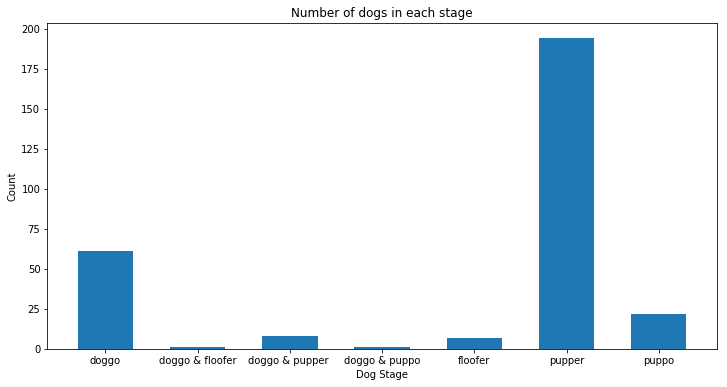

In [73]:
dog_stage = ['pupper', 'doggo', 'puppo', 'doggo & pupper ', 'floofer', 'doggo & puppo', 'doggo & floofer']
no_dogs = [194, 61, 22, 8, 7, 1, 1]

fig,ax = plt.subplots(figsize = (12,6))
plt.bar(dog_stage, no_dogs, width= 0.6)
plt.title("Number of dogs in each stage")
plt.xlabel('Dog Stage')
plt.ylabel('Count')

### 2- Common Sources

In [83]:
final_df.source.value_counts()

Twitter for iPhone     1861
Twitter Web Client       25
TweetDeck                10
Vine - Make a Scene       0
Name: source, dtype: int64

Text(0,0.5,'Number')

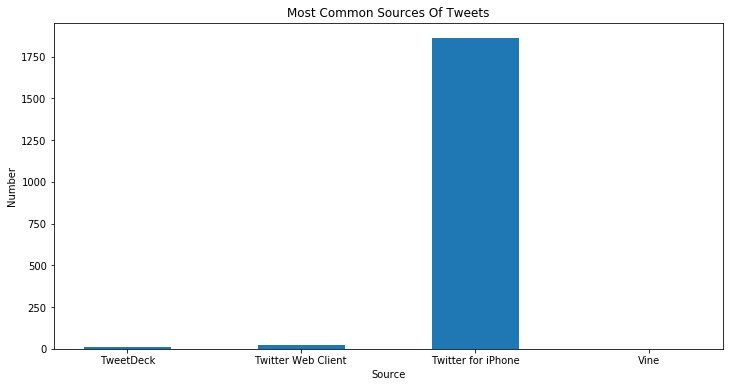

In [85]:
source_name= ['Twitter for iPhone', 'Twitter Web Client ', 'TweetDeck', 'Vine', ]
number= [1861, 25, 10, 0]
fig,ax = plt.subplots(figsize = (12,6))
plt.bar(source_name, number, width= 0.5)
plt.title("Most Common Sources Of Tweets")
plt.xlabel("Source")
plt.ylabel("Number")

In [76]:
final_df.retweet_count.describe()

count     1896.000000
mean      2800.941983
std       4711.308079
min         16.000000
25%        648.750000
50%       1386.500000
75%       3261.000000
max      79515.000000
Name: retweet_count, dtype: float64

In [77]:
final_df.favorite_count.describe()

count      1896.000000
mean       9042.924051
std       12248.136520
min          81.000000
25%        2083.000000
50%        4206.500000
75%       11520.500000
max      132810.000000
Name: favorite_count, dtype: float64

In [78]:
final_df.describe()

,in_reply_to_status_id,in_reply_to_user_id,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,2.300000e+01,2.300000e+01,1896.000000,1896.000000,1896.000000,1896.000000,1.896000e+03,1.896000e+03
mean,6.978112e+17,4.196984e+09,9042.924051,2800.941983,1.207278,0.594885,1.337713e-01,6.007494e-02
std,4.359384e+16,0.000000e+00,12248.136520,4711.308079,0.564350,0.273147,1.005117e-01,5.097523e-02
min,6.671522e+17,4.196984e+09,81.000000,16.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.732411e+17,4.196984e+09,2083.000000,648.750000,1.000000,0.360137,5.378615e-02,1.587760e-02
50%,6.757073e+17,4.196984e+09,4206.500000,1386.500000,1.000000,0.588030,1.167160e-01,4.906315e-02
75%,7.031489e+17,4.196984e+09,11520.500000,3261.000000,1.000000,0.850559,1.940848e-01,9.198323e-02
max,8.558181e+17,4.196984e+09,132810.000000,79515.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


### Insights
The most common Dog Stage is 'Pupper' and the least is 'Doggo & Floofer' and 'Doggo & Puppo.
 
The most common source of tweets is 'Twitter for iPhone' with a number of 1862 while the least is ' TweetDeck'  with 10 times.

The Mean Retweet Count is 2801.
 
The Mean Favorite Count is 9043.
 
The Minimum Image Number is (1) & The Maximum is (4).

There're some incorrect ratings I noticed, some of them were extracted incorrectly from the text, others were unfortunately extracted right but recieved low values such as '1/10', '2/10', '5/10'.
